In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the csv
df=pd.read_csv('C:/Users/dell/Desktop/Covid/covid_precondition.csv')
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [3]:
df['icu'].unique

<bound method Series.unique of 0         97
1         97
2          2
3          2
4          2
          ..
566597    97
566598    97
566599     2
566600    97
566601    97
Name: icu, Length: 566602, dtype: int64>

In [4]:
#mapping 97 & 98 categories to category 3 whic is NA
df['icu']=df['icu'].map({1:1,2:2,97:3,99:3})

In [5]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,3
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,3
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


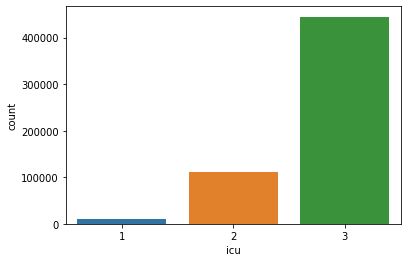

In [6]:
sns.countplot(x='icu',data=df)

In [7]:
#dropping the icu values where value == 3 which are NA's 
indexnames=df[df['icu']==3].index
df.drop(indexnames,inplace=True)

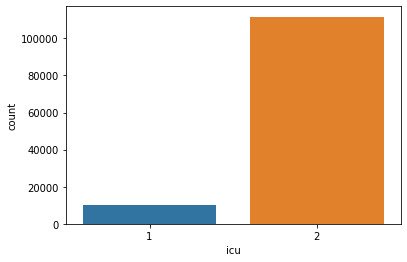

In [8]:
# now check the icu values on count plot ,only 1 and 2 cateogries are present
sns.countplot(x='icu',data=df)

In [9]:
df['pregnancy']

2          2
3         97
4          2
5         97
6         97
          ..
566584    97
566590    97
566591    97
566593    98
566599     2
Name: pregnancy, Length: 121788, dtype: int64

In [10]:
# mapping the 97and 98 cateogories to NA 
df['pregnancy']=df['pregnancy'].map({1:1,2:2,97:3,98:3})

In [11]:
df['pregnancy'].value_counts()

3    73165
2    47554
1     1069
Name: pregnancy, dtype: int64

In [12]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,3,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,3,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,3,...,2,1,2,2,2,2,2,99,1,2


In [13]:
df['date_died'].value_counts()

9999-99-99    89286
16-06-2020      628
08-06-2020      615
10-06-2020      612
12-06-2020      593
              ...  
11-02-2020        1
29-01-2020        1
11-03-2020        1
08-02-2020        1
10-02-2020        1
Name: date_died, Length: 124, dtype: int64

In [14]:
#drop id ,patient_type column which is not required
df.drop(['id','patient_type'],axis=1,inplace=True)
df.head()

,sex,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,1,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,...,2,2,2,2,1,2,2,99,1,2
3,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,3,2,2,...,2,2,2,2,2,2,2,99,1,2
4,1,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,...,2,1,2,1,2,2,2,99,1,2
5,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,3,1,2,...,2,2,2,2,2,2,2,99,1,1
6,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,3,2,2,...,2,1,2,2,2,2,2,99,1,2


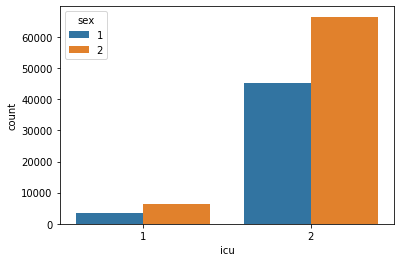

In [15]:
sns.countplot(x='icu',data=df,hue='sex')

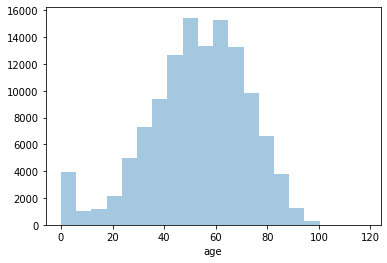

In [16]:
sns.distplot(df['age'],kde=False,bins=20)

In [17]:
#drop dates column which is not required
df.drop(['entry_date','date_symptoms','date_died'],axis=1,inplace=True)
df.head()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,1,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,1,30,3,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,2,2,1,47,3,1,2,2,2,2,2,2,2,2,2,99,1,1
6,2,2,2,63,3,2,2,2,2,1,2,2,2,2,2,99,1,2


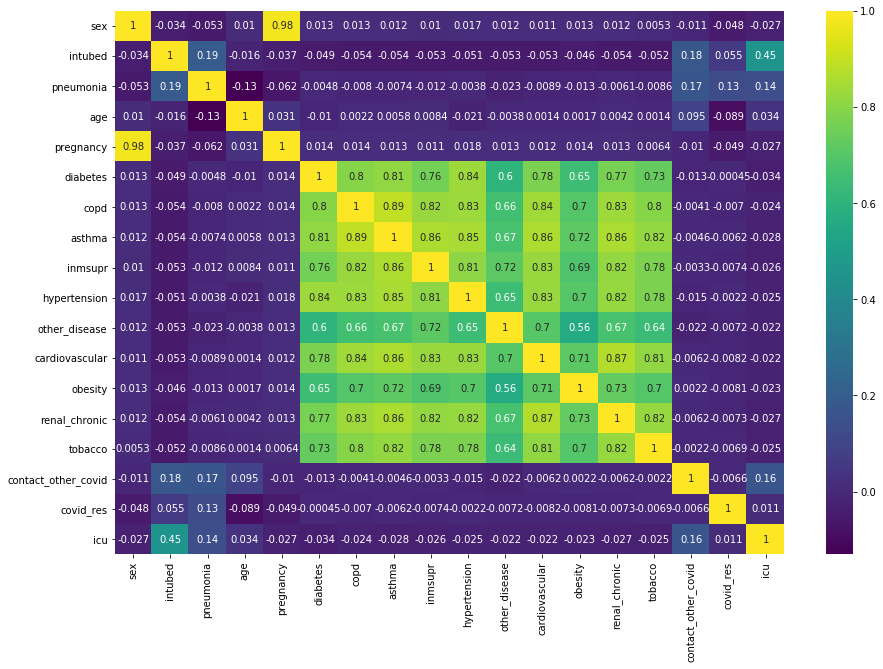

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

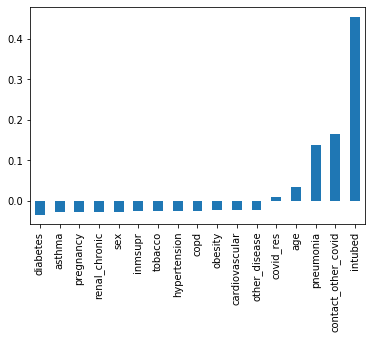

In [19]:
df.corr()['icu'][:-1].sort_values().plot(kind='bar')

In [20]:
X = df.drop('icu',axis=1)
y = df['icu']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:
#scaling the features set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(85251, 17)

In [23]:
X_test.shape

(36537, 17)

In [24]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.46      0.27      0.34      3097
           2       0.93      0.97      0.95     33440

    accuracy                           0.91     36537
   macro avg       0.70      0.62      0.64     36537
weighted avg       0.89      0.91      0.90     36537

[[  828  2269]
 [  988 32452]]


In [27]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.35      0.31      0.33      3097
           2       0.94      0.95      0.94     33440

    accuracy                           0.89     36537
   macro avg       0.65      0.63      0.64     36537
weighted avg       0.89      0.89      0.89     36537

[[  957  2140]
 [ 1751 31689]]


In [30]:
#random forest is gving the better accuracy
# brand new prediction 
single_person = df.drop('icu',axis=1).iloc[3]
single_person

sex                     2
intubed                 2
pneumonia               1
age                    47
pregnancy               3
diabetes                1
copd                    2
asthma                  2
inmsupr                 2
hypertension            2
other_disease           2
cardiovascular          2
obesity                 2
renal_chronic           2
tobacco                 2
contact_other_covid    99
covid_res               1
Name: 5, dtype: int64

In [31]:
single_person = scaler.transform(single_person.values.reshape(-1, 17))
single_person

array([[1.        , 1.        , 0.        , 0.40869565, 1.        ,
        0.        , 0.01030928, 0.01030928, 0.01030928, 0.01030928,
        0.01030928, 0.01030928, 0.01030928, 0.01030928, 0.01030928,
        1.        , 0.        ]])

In [32]:
rfc.predict(single_person)

array([2], dtype=int64)

In [33]:
df.iloc[3]

sex                     2
intubed                 2
pneumonia               1
age                    47
pregnancy               3
diabetes                1
copd                    2
asthma                  2
inmsupr                 2
hypertension            2
other_disease           2
cardiovascular          2
obesity                 2
renal_chronic           2
tobacco                 2
contact_other_covid    99
covid_res               1
icu                     1
Name: 5, dtype: int64